# Titanic: Machine Learning from Disaster - Applying Machine Learning Techniques 

Homepage: https://github.com/tien-le/kaggle-titanic

**unbelivable ... to achieve 1.000. How did they do this?**

**Just curious, how did they cheat the score?** ANS: maybe, we have the information existing in https://www.encyclopedia-titanica.org/titanic-victims/

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## References
https://www.kaggle.com/c/titanic

https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

https://triangleinequality.wordpress.com/2013/05/19/machine-learning-with-python-first-steps-munging/

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic

https://github.com/justmarkham/scikit-learn-videos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

### Load Corpus After Preprocessing ...

In [2]:
#Training Corpus
trn_corpus_after_preprocessing = pd.read_csv("output/trn_corpus_after_preprocessing.csv")

#Testing Corpus
tst_corpus_after_preprocessing = pd.read_csv("output/tst_corpus_after_preprocessing.csv")

In [3]:
#tst_corpus_after_preprocessing[tst_corpus_after_preprocessing["Fare"].isnull()]

In [4]:
trn_corpus_after_preprocessing.info()
print("-"*36)
tst_corpus_after_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 13 columns):
PassengerId          890 non-null int64
Male                 890 non-null int64
Pclass               890 non-null int64
Fare                 890 non-null float64
FarePerPerson        890 non-null float64
Title                890 non-null int64
AgeUsingMeanTitle    890 non-null float64
AgeClass             890 non-null float64
SexClass             890 non-null int64
FamilySize           890 non-null int64
AgeSquared           890 non-null float64
AgeClassSquared      890 non-null float64
Survived             890 non-null int64
dtypes: float64(6), int64(7)
memory usage: 90.5 KB
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId          418 non-null int64
Male                 418 non-null int64
Pclass               418 non-null int64
Fare                 418 non-null float64
FarePerP

## Basic & Advanced machine learning tools

## Agenda

- What is machine learning?
- What are the two main categories of machine learning?
- What are some examples of machine learning?
- How does machine learning "work"?

## What is machine learning?

One definition: "Machine learning is the semi-automated extraction of knowledge from data"

- **Knowledge from data**: Starts with a question that might be answerable using data
- **Automated extraction**: A computer provides the insight
- **Semi-automated**: Requires many smart decisions by a human

## What are the two main categories of machine learning?

**Supervised learning**: Making predictions using data
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

**Unsupervised learning**: Extracting structure from data

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"

## How does machine learning "work"?

High-level steps of supervised learning:

1. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

2. Then, make **predictions** on **new data** for which the label is unknown

The primary goal of supervised learning is to build a model that "generalizes": It accurately predicts the **future** rather than the **past**!

## Questions about machine learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

## Benefits and drawbacks of scikit-learn

### Benefits:

- **Consistent interface** to machine learning models
- Provides many **tuning parameters** but with **sensible defaults**
- Exceptional **documentation**
- Rich set of functionality for **companion tasks**
- **Active community** for development and support

### Potential drawbacks:

- Harder (than R) to **get started with machine learning**
- Less emphasis (than R) on **model interpretability**

### Further reading:

- Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)
- scikit-learn authors: [API design for machine learning software](http://arxiv.org/pdf/1309.0238v1.pdf)
- Data School: [Should you teach Python or R for data science?](http://www.dataschool.io/python-or-r-for-data-science/)

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a ordered/continuous response

- Note that each value we are predicting is the **response** (also known as: target, outcome, label, dependent variable)

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

### Load Corpus

In [5]:
trn_corpus_after_preprocessing.columns

Index(['PassengerId', 'Male', 'Pclass', 'Fare', 'FarePerPerson', 'Title',
       'AgeUsingMeanTitle', 'AgeClass', 'SexClass', 'FamilySize', 'AgeSquared',
       'AgeClassSquared', 'Survived'],
      dtype='object')

In [6]:
list_of_non_preditor_variables = ['Survived','PassengerId']

In [7]:
#Method 1
#x_train = trn_corpus_after_preprocessing.ix[:, trn_corpus_after_preprocessing.columns != 'Survived']
#y_train = trn_corpus_after_preprocessing.ix[:,"Survived"]

#Method 2
x_train = trn_corpus_after_preprocessing[trn_corpus_after_preprocessing.columns.difference(list_of_non_preditor_variables)].copy()
y_train = trn_corpus_after_preprocessing['Survived'].copy()
#y_train = trn_corpus_after_preprocessing.iloc[:,-1]
#y_train = trn_corpus_after_preprocessing[trn_corpus_after_preprocessing.columns[-1]]

#x_train

In [8]:
#y_train

In [9]:
x_train.columns

Index(['AgeClass', 'AgeClassSquared', 'AgeSquared', 'AgeUsingMeanTitle',
       'FamilySize', 'Fare', 'FarePerPerson', 'Male', 'Pclass', 'SexClass',
       'Title'],
      dtype='object')

In [10]:
# check the types of the features and response
#print(type(x_train))
#print(type(x_test))

In [11]:
#Method 1
#x_test = tst_corpus_after_preprocessing.ix[:, trn_corpus_after_preprocessing.columns != 'Survived']
#y_test = tst_corpus_after_preprocessing.ix[:,"Survived"]

#Method 2
x_test = tst_corpus_after_preprocessing[tst_corpus_after_preprocessing.columns.difference(list_of_non_preditor_variables)].copy()
y_test = tst_corpus_after_preprocessing['Survived'].copy()
#y_test = tst_corpus_after_preprocessing.iloc[:,-1]
#y_test = tst_corpus_after_preprocessing[tst_corpus_after_preprocessing.columns[-1]]

In [12]:
#x_test

In [13]:
#y_test

In [14]:
# display the first 5 rows
x_train.head()

,AgeClass,AgeClassSquared,AgeSquared,AgeUsingMeanTitle,FamilySize,Fare,FarePerPerson,Male,Pclass,SexClass,Title
0,66.0,4356.0,484.0,22.0,1,7.2500,3.62500,1,3,3,3
1,38.0,1444.0,1444.0,38.0,1,71.2833,35.64165,0,1,0,3
2,78.0,6084.0,676.0,26.0,0,7.9250,7.92500,0,3,0,3
3,35.0,1225.0,1225.0,35.0,1,53.1000,26.55000,0,1,0,3
4,105.0,11025.0,1225.0,35.0,0,8.0500,8.05000,1,3,3,3


In [15]:
# display the last 5 rows
x_train.tail()

,AgeClass,AgeClassSquared,AgeSquared,AgeUsingMeanTitle,FamilySize,Fare,FarePerPerson,Male,Pclass,SexClass,Title
885,117.000000,13689.00000,1521.000000,39.000000,5,29.125,4.854167,0,3,0,3
886,54.000000,2916.00000,729.000000,27.000000,0,13.000,13.000000,1,2,2,0
887,19.000000,361.00000,361.000000,19.000000,0,30.000,30.000000,0,1,0,3
888,86.061263,7406.54097,822.948997,28.687088,3,23.450,5.862500,0,3,0,3
889,26.000000,676.00000,676.000000,26.000000,0,30.000,30.000000,1,1,1,3


In [16]:
# check the shape of the DataFrame (rows, columns)
x_train.shape

(890, 11)

What are the features?
- **AgeClass:** 
- **AgeClassSquared:** 
- **AgeSquared:** 
- ...

What is the response?
- **Survived:** 1-Yes, 0-No

What else do we know?
- Because the response variable is dicrete, this is a **Classification** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

Note that if the response variable is continuous, this is a **regression** problem.

In [17]:
print(x_train.shape)
display(x_train.head())
display(x_train.describe())

(890, 11)


,AgeClass,AgeClassSquared,AgeSquared,AgeUsingMeanTitle,FamilySize,Fare,FarePerPerson,Male,Pclass,SexClass,Title
0,66.0,4356.0,484.0,22.0,1,7.2500,3.62500,1,3,3,3
1,38.0,1444.0,1444.0,38.0,1,71.2833,35.64165,0,1,0,3
2,78.0,6084.0,676.0,26.0,0,7.9250,7.92500,0,3,0,3
3,35.0,1225.0,1225.0,35.0,1,53.1000,26.55000,0,1,0,3
4,105.0,11025.0,1225.0,35.0,0,8.0500,8.05000,1,3,3,3


,AgeClass,AgeClassSquared,AgeSquared,AgeUsingMeanTitle,FamilySize,Fare,FarePerPerson,Male,Pclass,SexClass,Title
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,65.093487,5328.589203,1054.854311,29.759723,0.905618,32.231685,19.930045,0.647191,2.307865,1.546067,2.933708
std,33.055330,5202.072217,891.137944,13.015510,1.614080,49.714597,35.859086,0.478113,0.836220,1.316424,0.412254
min,0.920000,0.846400,0.176400,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.000000,1600.000000,484.000000,22.000000,0.000000,7.925000,7.250000,0.000000,2.000000,0.000000,3.000000
50%,63.000000,3969.000000,900.000000,30.000000,0.000000,14.454200,8.331250,1.000000,3.000000,2.000000,3.000000
75%,90.000000,8100.000000,1225.000000,35.000000,1.000000,31.000000,23.666667,1.000000,3.000000,3.000000,3.000000
max,222.000000,49284.000000,6400.000000,80.000000,10.000000,512.329200,512.329200,1.000000,3.000000,3.000000,3.000000


### Decision Trees Classification

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [19]:
#Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. 
#Below is an example export of a tree trained on the entire iris dataset:
with open("output/titanic.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

#Then we can use Graphviz’s dot tool to create a PDF file (or any other supported file type): 
#dot -Tpdf titanic.dot -o titanic.pdf.
import os
os.unlink('output/titanic.dot')

#Alternatively, if we have Python module pydotplus installed, we can generate a PDF file 
#(or any other supported file type) directly in Python:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("output/titanic.pdf")

True

In [20]:
#The export_graphviz exporter also supports a variety of aesthetic options, 
#including coloring nodes by their class (or value for regression) 
#and using explicit variable and class names if desired. 
#IPython notebooks can also render these plots inline using the Image() function:


"""from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names= list(x_train.columns[1:]), #iris.feature_names,  
                         class_names= ["Survived"], #iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())"""

'from IPython.display import Image  \ndot_data = tree.export_graphviz(clf, out_file=None, \n                         feature_names= list(x_train.columns[1:]), #iris.feature_names,  \n                         class_names= ["Survived"], #iris.target_names,  \n                         filled=True, rounded=True,  \n                         special_characters=True)  \ngraph = pydotplus.graph_from_dot_data(dot_data)  \nImage(graph.create_png())'

In [21]:
print("accuracy score: ", clf.score(x_test,y_test))

accuracy score:  0.77990430622


**Classification accuracy:** percentage of correct predictions

In [22]:
#After being fitted, the model can then be used to predict the class of samples:
y_pred_class = clf.predict(x_test);

#Alternatively, the probability of each class can be predicted, 
#which is the fraction of training samples of the same class in a leaf:
clf.predict_proba(x_test);

In [23]:
# calculate accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.77990430622


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [24]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [25]:
# calculate the percentage of ones
y_test.mean()

0.36363636363636365

In [26]:
# calculate the percentage of zeros
1 - y_test.mean()

0.63636363636363635

In [27]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.63636363636363635

In [28]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.636364
Name: Survived, dtype: float64

Comparing the **true** and **predicted** response values

In [29]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1]
Pred: [0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1]


**Conclusion:** ???

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [30]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[214  52]
 [ 40 112]]


**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [31]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [32]:
print(TP, TN, FP, FN)

112 214 52 40


## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [33]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.77990430622
0.77990430622


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [34]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.22009569378
0.22009569378


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [35]:
print(TN / float(TN + FP))

0.804511278195


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [36]:
print(FP / float(TN + FP))

0.195488721805


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [37]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.682926829268
0.682926829268


In [38]:
print("Presicion: ", metrics.precision_score(y_test, y_pred_class))
print("Recall: ", metrics.recall_score(y_test, y_pred_class))
print("F1 score: ", metrics.f1_score(y_test, y_pred_class))

Presicion:  0.682926829268
Recall:  0.736842105263
F1 score:  0.708860759494


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Support Vector Machine (SVM)

### Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

Ref: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [39]:
from sklearn import svm

model = svm.LinearSVC()

# fit a model to the data
model.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [40]:
acc_score = model.score(x_test, y_test)

print("Accuracy score: ", acc_score)

Accuracy score:  0.361244019139


In [41]:
y_pred_class = model.predict(x_test) 

In [42]:
from sklearn import metrics

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

print(confusion_matrix)

[[ 26 240]
 [ 27 125]]


In [44]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.49      0.10      0.16       266
          1       0.34      0.82      0.48       152

avg / total       0.44      0.36      0.28       418

[[ 26 240]
 [ 27 125]]


### Classifier comparison

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [46]:
#classifiers

In [47]:
#x_train

In [48]:
#sns.pairplot(x_train)

In [49]:
x_train_scaled = StandardScaler().fit_transform(x_train)

x_test_scaled = StandardScaler().fit_transform(x_test)

In [50]:
x_train_scaled[0]

array([ 0.02743953, -0.187067  , -0.64095047, -0.59652571,  0.05850706,
       -0.50278454, -0.4549534 ,  0.73833521,  0.82816049,  1.10507752,
        0.1608944 ])

In [51]:
len(x_train_scaled[0])

11

In [52]:
df_x_train_scaled = pd.DataFrame(columns=x_train.columns, data=x_train_scaled)

In [53]:
df_x_train_scaled.head()

,AgeClass,AgeClassSquared,AgeSquared,AgeUsingMeanTitle,FamilySize,Fare,FarePerPerson,Male,Pclass,SexClass,Title
0,0.027440,-0.187067,-0.640950,-0.596526,0.058507,-0.502785,-0.454953,0.738335,0.828160,1.105078,0.160894
1,-0.820101,-0.747159,0.436930,0.633468,0.058507,0.785958,0.438395,-1.354398,-1.564901,-1.175106,0.160894
2,0.390671,0.145295,-0.425374,-0.289027,-0.561389,-0.489199,-0.334972,-1.354398,0.828160,-1.175106,0.160894
3,-0.910909,-0.789281,0.191038,0.402844,0.058507,0.419998,0.184714,-1.354398,-1.564901,-1.175106,0.160894
4,1.207943,1.095643,0.191038,0.402844,-0.561389,-0.486684,-0.331484,0.738335,0.828160,1.105078,0.160894


In [54]:
#sns.pairplot(df_x_train_scaled)

### How To Compare Machine Learning Algorithms in Python with scikit-learn

Ref: http://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

#### Choose The Best Machine Learning Model

How do you choose the best model for your problem?

When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics.

Using resampling methods like cross validation, you can get an estimate for how accurate each model may be on unseen data. You need to be able to use these estimates to choose one or two best models from the suite of models that you have created.

#### Compare Machine Learning Models Carefully

When you have a new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives.

The same idea applies to model selection. You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two to finalize.

A way to do this is to use different visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies.

#### Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In the example below 6 different algorithms are compared:

    Logistic Regression
    Linear Discriminant Analysis
    K-Nearest Neighbors
    Classification and Regression Trees
    Naive Bayes
    Support Vector Machines

The problem is a standard binary classification dataset from the UCI machine learning repository called the Pima Indians onset of diabetes problem. The problem has two classes and eight numeric input variables of varying scales.

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Each algorithm is given a short name, useful for summarizing results afterward.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection

LR: 0.777528 (+-0.025024)
LDA: 0.806742 (+-0.030894)
KNN: 0.707865 (+-0.046599)
CART: 0.777528 (+-0.032096)
NB: 0.770787 (+-0.049540)
SVM: 0.670787 (+-0.079775)


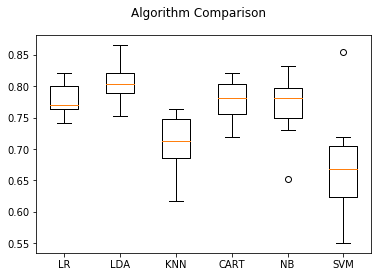

In [56]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Comment:
From above results, it would suggest that both logistic regression, linear discriminate analysis, CART and NB are perhaps worthy of further study on this problem. Note that, we use **x_train** for cross validation.

#### Using some hyperparameters ...

In [57]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gaussian Process"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    #, GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True), # Take too long...
    ]

# iterate over classifiers
for name, model in zip(names, classifiers):
    # fit a model to the data
    model.fit(x_train_scaled, y_train)
    
    # make predictions - not used
    
    # summarize the fit of the model
    acc_score = model.score(x_test_scaled, y_test)
    print(name, " - accuracy score: ", acc_score)
#end for

Nearest Neighbors  - accuracy score:  0.777511961722
Linear SVM  - accuracy score:  1.0
RBF SVM  - accuracy score:  0.877990430622
Decision Tree  - accuracy score:  0.928229665072
Random Forest  - accuracy score:  0.746411483254
Neural Net  - accuracy score:  0.913875598086
AdaBoost  - accuracy score:  0.858851674641
Naive Bayes  - accuracy score:  0.827751196172
QDA  - accuracy score:  0.777511961722


Nearest Neighbors: 0.808989 (+-0.030149)
Linear SVM: 0.786517 (+-0.034813)
RBF SVM: 0.792135 (+-0.027176)
Decision Tree: 0.807865 (+-0.027269)
Random Forest: 0.805618 (+-0.032194)
Neural Net: 0.786517 (+-0.032565)
AdaBoost: 0.804494 (+-0.028953)
Naive Bayes: 0.771910 (+-0.035549)
QDA: 0.791011 (+-0.029812)


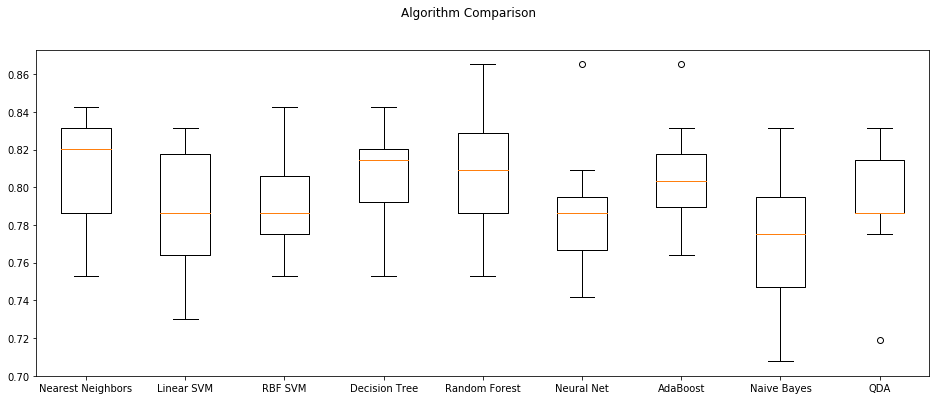

In [58]:
names_classifiers = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gaussian Process"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    #, GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True), # Take too long...
    ]

# prepare configuration for cross validation test harness
seed = 7

models = zip(names_classifiers, classifiers)

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Comment:
From above results, it would suggest that both Nearest Neighbors, Decision Tree, Random Forest and AdaBoost are perhaps worthy of further study on this problem. Note that, we use **x_train_scaled** for cross validation.

### How to Develop Your First XGBoost Model in Python with scikit-learn

Ref: 
+ http://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
+ http://machinelearningmastery.com/stochastic-gradient-boosting-xgboost-scikit-learn-python/

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.00%


/home/lavie/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
# Save Model Using pickle
import pickle

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# save the model to disk
filename = 'output/XGBClassifier_model-pickle.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# make predictions for test data
y_pred = loaded_model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.00%


In [61]:
# Save Model Using joblib
from sklearn.externals import joblib

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# save the model to disk
filename = 'output/XGBClassifier_model-joblib.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)

# make predictions for test data
y_pred = loaded_model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.00%


In [62]:
# Using data after scaling ...

# fit model no training data
model = XGBClassifier()
model.fit(x_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(x_test_scaled)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.69%


In [63]:
from sklearn.model_selection import KFold, cross_val_score

seed = 7
kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier()
results = cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

[ 0.76404494  0.83146067  0.82022472  0.85393258  0.87640449  0.85393258
  0.83146067  0.80898876  0.87640449  0.85393258]
max:  0.876404494382
min:  0.76404494382
mean:  0.837078651685
Accuracy: 0.84 (+/- 0.06)


In [64]:
#for train_indices, test_indices in kfold.split(x_train):
#    print('Train: %s | test: %s' % (train_indices, test_indices))

### Ensemble Machine Learning Algorithms

Ref: http://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

### Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

   + **Bagging:** Building multiple models (typically of the same type) from different subsamples of the training dataset.
   + **Boosting:** Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
   + **Voting:** Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.


Each ensemble algorithm is demonstrated using 10 fold cross validation, a standard technique used to estimate the performance of any machine learning algorithm on unseen data.

In this part, we discovered ensemble machine learning algorithms for improving the performance of models on our problems.
+ Bagging Ensembles including Bagged Decision Trees, Random Forest and Extra Trees.
+ Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.
+ Voting Ensembles for averaging the predictions for any arbitrary models.


### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

   + Bagged Decision Trees
   + Random Forest
   + Extra Trees

### Bagged Decision Trees

Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In the example below see an example of using the BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100

clf = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a robust estimate of model accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.74157303  0.80898876  0.7752809   0.79775281  0.87640449  0.84269663
  0.80898876  0.82022472  0.83146067  0.85393258]
max:  0.876404494382
min:  0.741573033708
mean:  0.815730337079
Accuracy: 0.82 (+/- 0.07)


### Random Forest

Random forest is an extension of bagged decision trees.

Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of the tree, only a random subset of features are considered for each split.

We can construct a Random Forest model for classification using the **RandomForestClassifier** (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

The example below provides an example of Random Forest for classification with 100 trees and split points chosen from a random selection of 3 features.

In [66]:
# Random Forest Classification
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 100
max_features = 3

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a mean estimate of classification accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.74157303  0.83146067  0.78651685  0.79775281  0.87640449  0.86516854
  0.80898876  0.79775281  0.79775281  0.86516854]
max:  0.876404494382
min:  0.741573033708
mean:  0.816853932584
Accuracy: 0.82 (+/- 0.08)


### Extra Trees

Extra Trees are another modification of **bagging** where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the **ExtraTreesClassifier** (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) class. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

The example below provides a demonstration of extra trees with the number of trees set to 100 and splits chosen from 7 random features.

In [67]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 100
max_features = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a mean estimate of classification accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.70786517  0.80898876  0.78651685  0.80898876  0.85393258  0.86516854
  0.83146067  0.79775281  0.79775281  0.84269663]
max:  0.865168539326
min:  0.707865168539
mean:  0.810112359551
Accuracy: 0.81 (+/- 0.08)


## Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

+ AdaBoost
+ Stochastic Gradient Boosting


### AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the **AdaBoostClassifier** (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) class. An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. This class implements the algorithm known as AdaBoost-SAMME [2].

The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm.

In [68]:
# AdaBoost Classification
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a mean estimate of classification accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.79775281  0.80898876  0.80898876  0.82022472  0.83146067  0.80898876
  0.83146067  0.80898876  0.86516854  0.84269663]
max:  0.865168539326
min:  0.797752808989
mean:  0.822471910112
Accuracy: 0.82 (+/- 0.04)


### Stochastic Gradient Boosting

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

You can construct a Gradient Boosting model for classification using the **GradientBoostingClassifier** (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) class. Gradient Boosting for classification - GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage **n\_classes\_** regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.

In [69]:
# Stochastic Gradient Boosting Classification
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a mean estimate of classification accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.78651685  0.82022472  0.79775281  0.84269663  0.87640449  0.84269663
  0.83146067  0.78651685  0.88764045  0.82022472]
max:  0.887640449438
min:  0.786516853933
mean:  0.829213483146
Accuracy: 0.83 (+/- 0.07)


## Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the **VotingClassifier** (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) class. Soft Voting/Majority Rule classifier for unfitted estimators. *New in version 0.17.*


The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem.

In [70]:
# Voting Ensemble for Classification
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

# create the sub models
estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)

print(results)
print("max: ", results.max())
print("min: ", results.min())
print("mean: ", results.mean())

# We get a mean estimate of classification accuracy.
print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2)) 

[ 0.83146067  0.84269663  0.75280899  0.76404494  0.83146067  0.82022472
  0.80898876  0.7752809   0.7752809   0.80898876]
max:  0.842696629213
min:  0.752808988764
mean:  0.801123595506
Accuracy: 0.80 (+/- 0.06)
